In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [24]:
train = pd.read_csv('TRAIN.csv')
test = pd.read_csv('TEST.csv')

In [25]:
train.head()

,idx,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0
1,1,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0
2,2,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
3,3,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
4,4,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [26]:
train.shape

(212, 15)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idx       212 non-null    int64  
 1   age       212 non-null    int64  
 2   sex       212 non-null    int64  
 3   cp        212 non-null    int64  
 4   trestbps  212 non-null    int64  
 5   chol      212 non-null    int64  
 6   fbs       212 non-null    int64  
 7   restecg   212 non-null    int64  
 8   thalach   212 non-null    int64  
 9   exang     212 non-null    int64  
 10  oldpeak   212 non-null    float64
 11  slope     212 non-null    int64  
 12  ca        212 non-null    int64  
 13  thal      212 non-null    int64  
 14  target    212 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 25.0 KB


In [28]:
# I will first create a feature set
X = train.iloc[:,1:-1].values
X

array([[70.,  1.,  0., ...,  1.,  3.,  2.],
       [62.,  0.,  0., ...,  1.,  0.,  2.],
       [44.,  1.,  2., ...,  2.,  0.,  2.],
       ...,
       [50.,  0.,  1., ...,  2.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       [47.,  1.,  0., ...,  2.,  0.,  2.]])

In [29]:
y = train.iloc[:,-1].values
y

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

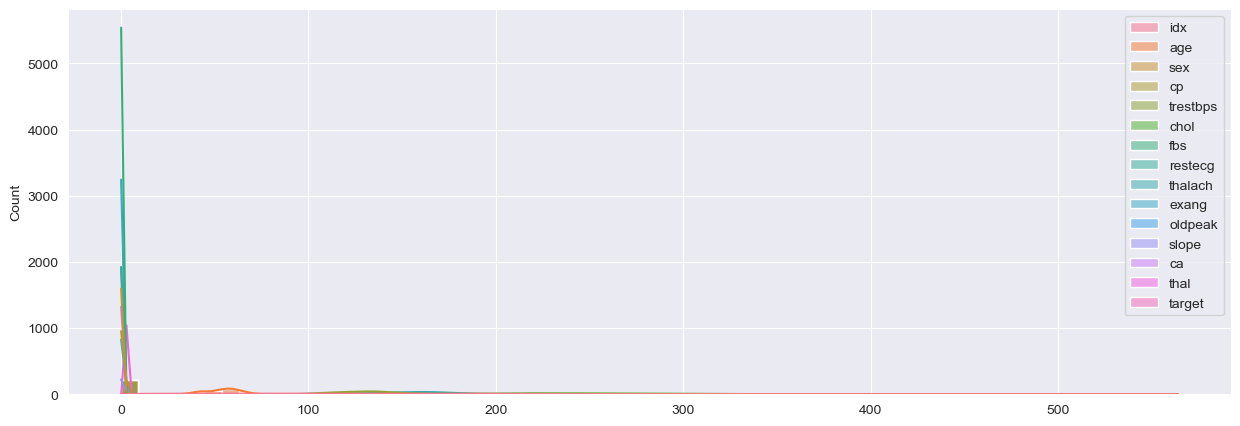

In [30]:
sns.histplot(train, kde=True)
plt.show()

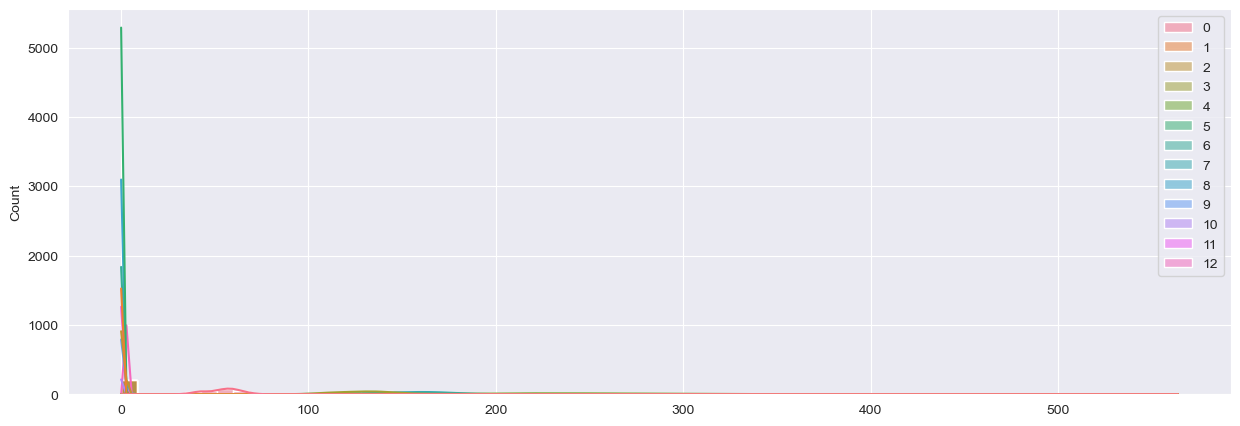

In [31]:
sns.histplot(X, kde=True)
plt.show()

In [32]:
from scipy.stats import shapiro

stat, p = shapiro(X)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.642, p=0.000
Sample does not look Gaussian (reject H0)


In [33]:
from scipy.stats import shapiro

stat, p = shapiro(train)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.661, p=0.000
Sample does not look Gaussian (reject H0)


In [34]:
numerical_cols = ['age','trestbps','chol','thalach','oldpeak','slope']
categorical_cols = list(set(train.columns) - set(numerical_cols))
categorical_cols.remove('idx')
categorical_cols.remove('target')
# categorical_cols

In [35]:
numerical_data = train[numerical_cols]
categorical_data = train[categorical_cols]

In [36]:
stat, p = shapiro(numerical_data.values)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.893, p=0.000
Sample does not look Gaussian (reject H0)


In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

I'm gonna use Decision Tree, since this algorithm is not sensitive to the scale of the variables, so I don't need to standardize the data before fitting the model. In fact, decision trees can work with both categorical and numerical features without the need for any feature transformation.

In [38]:
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [39]:
# clf = LogisticRegression()
clf = DecisionTreeClassifier()
clf.fit(X, y)
prediction = clf.predict(X)
print("f1_score: ",f1_score(y, prediction, average="micro"))
print("accuracy_score: ", accuracy_score(y, prediction))

f1_score:  1.0
accuracy_score:  1.0


In [40]:
test.head()

,idx,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,65,1,3,138,282,1,0,174,0,1.4,1,1,2
1,1,66,0,2,146,278,0,0,152,0,0.0,1,1,2
2,2,47,1,2,108,243,0,1,152,0,0.0,2,0,2
3,3,60,1,0,125,258,0,0,141,1,2.8,1,1,3
4,4,50,1,0,150,243,0,0,128,0,2.6,1,0,3


In [41]:
test_X = test.iloc[:,1:].values
test_X.shape

(91, 13)

In [42]:
test_pred = clf.predict(test_X)
test_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1])

In [43]:
test_df = pd.DataFrame()
test_df["idx"] = test.idx
test_df["target"] = test_pred
test_df.to_csv("Nguyen_2069407.csv", index=False)

In [44]:
test_df.shape

(91, 2)